### **LIMITATIONS OF GRAPH QUERY**
- **Main Limitation**: relaibility of user query &rarr; cypher translation
----------------
**Strategies**
- Filtering Graph Schema
- Validating the Cypher Query
- Few shot prompting

### *FILTERING*

In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
from langchain_groq import ChatGroq
os.getenv("GROQ_API_KEY")
llm=ChatGroq(model="llama-3.3-70b-versatile", temperature=0)

In [ ]:
from langchain_community.chains.graph_qa.cypher import GraphCypherQAChain
chain=GraphCypherQAChain.from_llm(
    graph=graph,llm=llm,exclude_types=['Concept']
)
# removing certain nodes allows the llm to foucs on certain propery

### *Validating the cypher query*
- Diffculy in interpreting the direction of relationships.
- the graph schema is predefined when instantiaing the chain, after the cypher is generated we cna validate the cypher against the schema.

In [ ]:
chain=GraphCypherQAChain.from_llm(
    graph=graph,llm,validate_cypher=True
)

1. Detects the nodes and relationships
2. Determines the directions of relationships
3. Cheks the graph schema
4. Update the direction of the relationship

### *Few shot prompting*
- giving hte example query and then cypher query examples
- 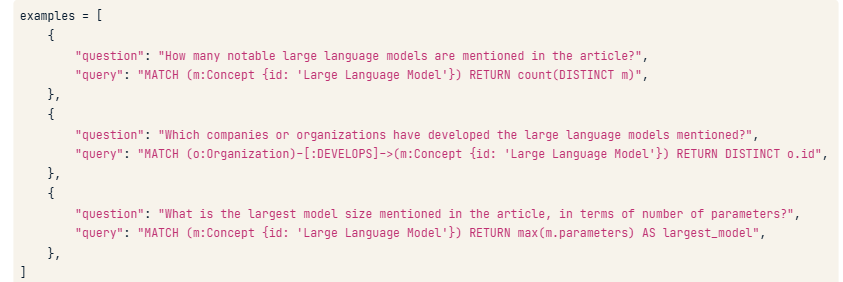

In [ ]:
from langchain_core.prompts import FewShotPromptTemplate,PromptTemplate
example_prompt=PromptTemplate.from_template(
    "User_input:{question}\nCypher query:{query}"
)
cypher_prompt=FewShotPromptTemplate(
    exmamples=examples,
    example_prompt=example_prompt,
    prefix="You are a Neo4j expert. Given an input question, create a syntactically correct
    Cypher query to run.\n\nHere is the schema information\n{schema}.\n\nonlocalBelow are a number of examples of questiosns and their corresponding 
    Cypher queries.",
    suffix="User input:{question}\nCypher query",
    input_variables=["question"]
    
)

In [ ]:
chain=GraphCypherQAChain.from_llm(
    graph=graph,llm,validate_cypher=True,cypher_prompt=cypher_prompt
)